In [1]:

# Install EarthPy
# https://pip.pypa.io/en/stable/
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.0 MB/s eta 0:00:00


In [2]:
# Import the needed packages, I've linked the docs in case you'd like to read more
import os #https://docs.python.org/3/library/os.html
from glob import glob #https://docs.python.org/3/library/glob.html
import numpy as np #https://numpy.org/
import matplotlib.pyplot as plt #https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot
from matplotlib.colors import ListedColormap #https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html
import earthpy as et #https://earthpy.readthedocs.io/en/latest/api/earthpy-data.html
import earthpy.spatial as es #https://earthpy.readthedocs.io/en/latest/api/earthpy.spatial.html
import earthpy.plot as ep #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html

In [3]:

# List the available data sets
et.data
     

Available Datasets: ['california-rim-fire', 'co-flood-extras', 'cold-springs-fire', 'cold-springs-landsat-scenes', 'cold-springs-modis-h4', 'colorado-flood', 'cs-test-landsat', 'cs-test-naip', 'naip-fire-crop', 'ndvi-automation', 'spatial-vector-lidar', 'twitter-flood', 'vignette-elevation', 'vignette-landsat']

In [4]:


# Get Landasat data
# https://earthpy.readthedocs.io/en/latest/api/earthpy.io.html#earthpy.io.Data.get_data
data = et.data.get_data("vignette-landsat")

Extracted output to /root/earth-analytics/data/vignette-landsat/.


In [5]:
# List out contents of downloaded Landsat data directory
# https://man7.org/linux/man-pages/man1/ls.1.html
!ls /root/earth-analytics/data/vignette-landsat/

LC08_L1TP_034032_20160621_20170221_01_T1_ANG.txt
LC08_L1TP_034032_20160621_20170221_01_T1_MTL.txt
LC08_L1TP_034032_20160621_20170221_01_T1_pixel_qa_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_radsat_qa_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_aerosol_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band1_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band2_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band3_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band4_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band6_crop.tif
LC08_L1TP_034032_20160621_20170221_01_T1_sr_band7_crop.tif
vector_layers


In [6]:
# Set your home working directory
os.chdir(os.path.join(et.io.HOME, "earth-analytics")) #https://docs.python.org/3/library/os.html#os.chdir

# Stack the Landsat 8 bands
# This creates a numpy array with each entry representing a file path that corresponds to a single band of the Landsat 8 data
landsat_path = glob("data/vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band*_crop.tif")

# Sort the array
landsat_path.sort() #https://numpy.org/doc/stable/reference/generated/numpy.sort.html

# Convert the array of raster file paths into a stacked numpy array, set no data value to -9999
arr_st, meta = es.stack(landsat_path, nodata=-9999) #https://earthpy.readthedocs.io/en/latest/api/earthpy.spatial.html#earthpy.spatial.stack
     


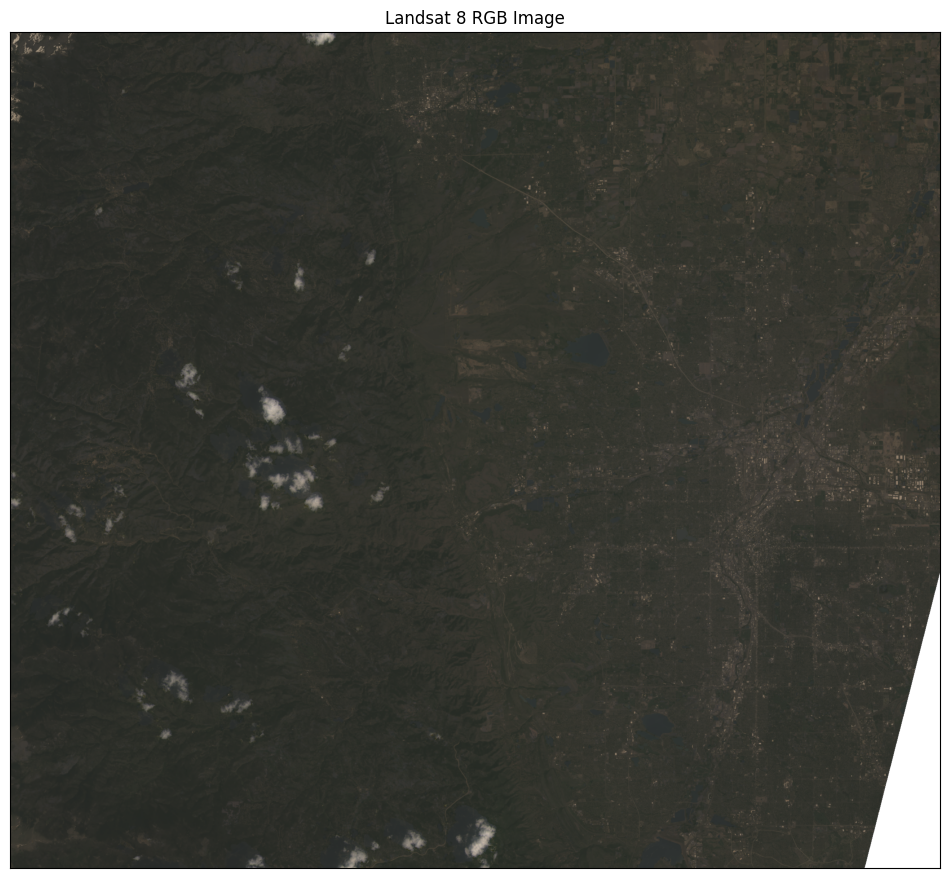

In [7]:

# Plot RBG image
fig, ax = plt.subplots(figsize=(12, 12)) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
ep.plot_rgb(arr_st, rgb=(3, 2, 1), ax=ax, title="Landsat 8 RGB Image") #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.plot_rgb
plt.show() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

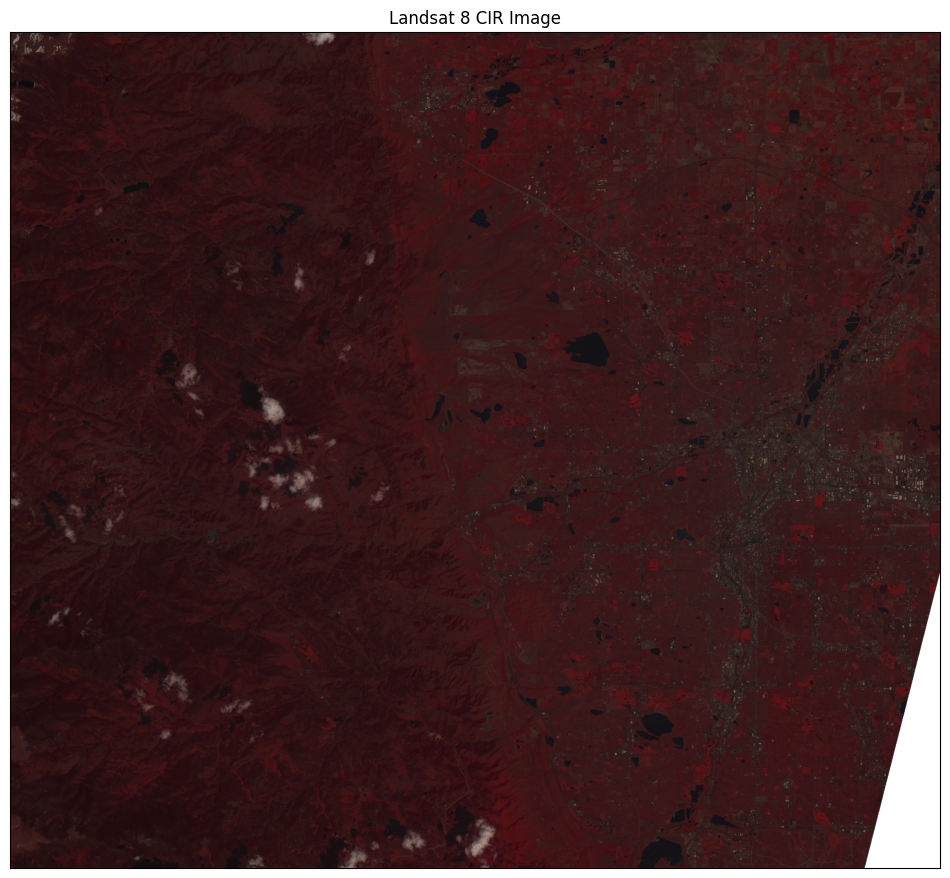

In [8]:

# Plot color infrared (CIR) image
# Create figure with one plot
fig, ax = plt.subplots(figsize=(12, 12)) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Plot NIR, red, and green bands, respectively, with stretch
ep.plot_rgb(
    arr_st,
    rgb=(4, 3, 2),
    ax=ax,
    title="Landsat 8 CIR Image",
    ) #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.plot_rgb

plt.show() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

In [9]:
# Calculate NDVI
# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
ndvi = es.normalized_diff(arr_st[4], arr_st[3]) #https://earthpy.readthedocs.io/en/latest/api/earthpy.spatial.html#earthpy.spatial.normalized_diff
     


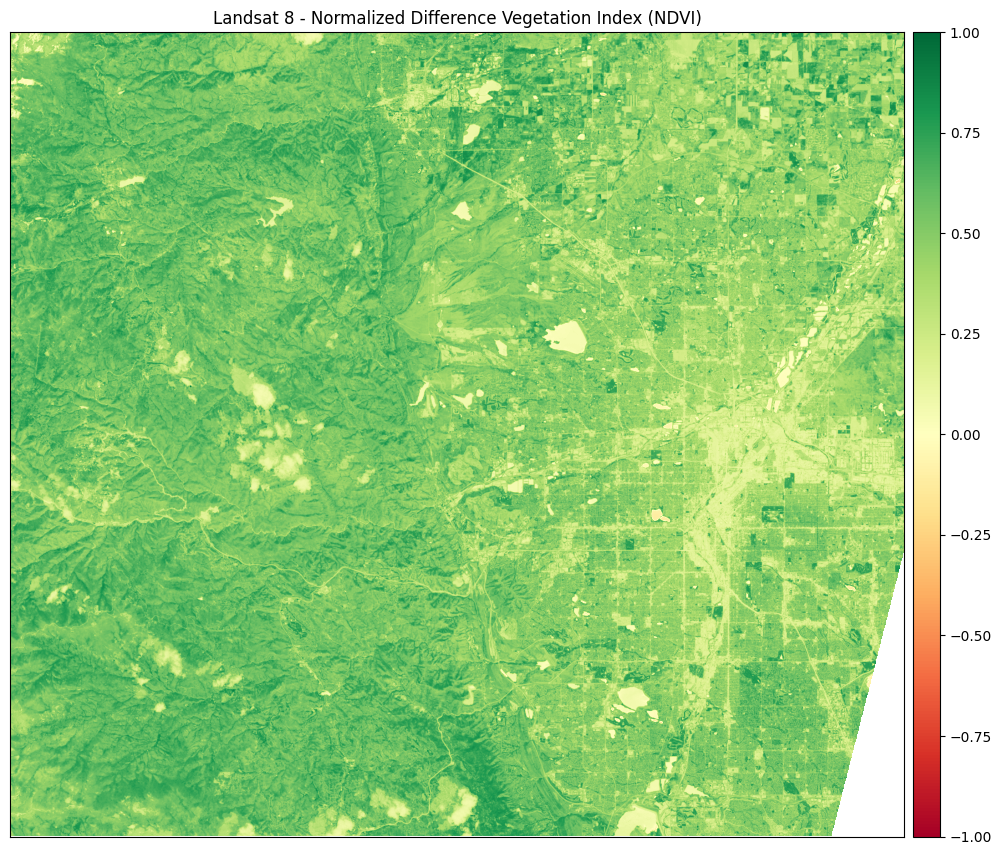

<Axes: title={'center': 'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [10]:
# Plot NDVI

title = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=title, vmin=-1, vmax=1) #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.plot_bands


     

In [11]:
# Create NDVI classes
# Values under 0 will be classified together as no vegetation. 
# Additional classes will be created for bare area and low, moderate, and high vegetation areas.
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins) #https://numpy.org/doc/stable/reference/generated/numpy.digitize.html

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
    ) #https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_where.html

np.unique(ndvi_landsat_class) #https://numpy.org/doc/stable/reference/generated/numpy.unique.html
     

masked_array(data=[1, 2, 3, 4, 5, --],
             mask=[False, False, False, False, False,  True],
       fill_value=999999)

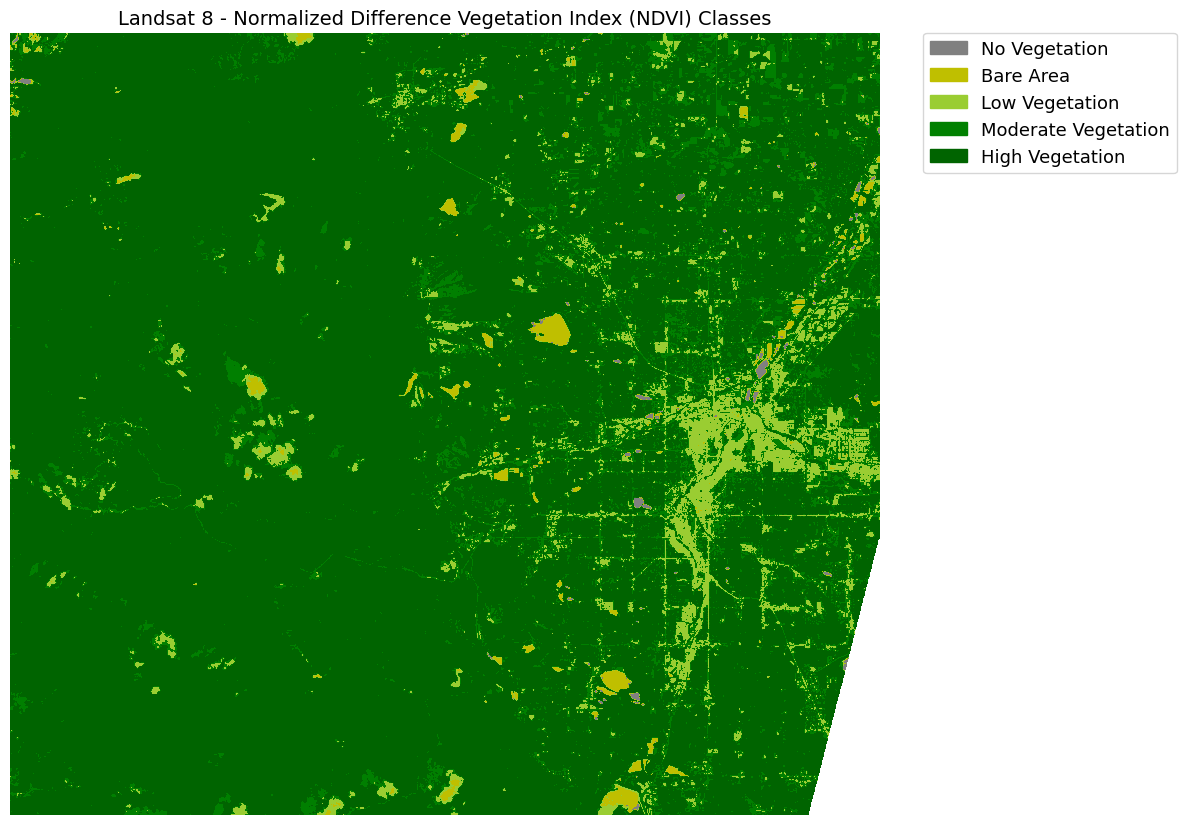

In [12]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors) #https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class) #https://numpy.org/doc/stable/reference/generated/numpy.unique.html
classes = classes.tolist() #https://numpy.org/doc/stable/reference/generated/numpy.ndarray.tolist.html

# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names) #https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.draw_legend

ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
    ) #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

ax.set_axis_off() #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_axis_off.html

# Auto adjust subplot to fit figure size
plt.tight_layout() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

In [13]:
class NDVI:
  def __init__(self, data_dir, file_name_glob, no_data_value):
    self.data_dir = data_dir
    self.file_name_glob = file_name_glob
    self.no_data_value = no_data_value
    
    os.chdir(os.path.join(et.io.HOME, data_dir))
  
  def calculate(self, red_band_number, nir_band_number):
    data_path = glob(
    self.file_name_glob
    )
    data_path.sort()
    self.arr_st, self.meta = es.stack(landsat_path, nodata=-9999)
    self.ndvi = es.normalized_diff(self.arr_st[nir_band_number], self.arr_st[red_band_number])
  
  def plot_ndvi(self, layer, titles, cmap):
    ep.plot_bands(layer, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)
  
  def classify(self, class_bins):
    # Create classes and apply to NDVI results
    self.ndvi_class = np.digitize(self.ndvi, class_bins)
    # Apply the nodata mask to the newly classified NDVI data
    self.ndvi_class = np.ma.masked_where(
        np.ma.getmask(self.ndvi), self.ndvi_class
    )
    self.classes = np.unique(self.ndvi_class)
    self.classes = self.classes.tolist()
    self.classes = self.classes[0:5]

  def plot_classes(self, class_names, cmap_colors, title):
    cmap = ListedColormap(cmap_colors)
    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(self.ndvi_class, cmap=cmap)
    ep.draw_legend(im_ax=im, classes=self.classes, titles=class_names)
    ax.set_title(title, fontsize=14)
    ax.set_axis_off()
    plt.tight_layout()


def run_everything(
    data_dir,
    file_name_glob,
    no_data_value,
    red_band_number,
    nir_band_number,
    ndvi_plot_title,
    ndvi_plot_cmap,
    ndvi_class_bins,
    ndvi_class_names,
    ndvi_class_colors,
    ndvi_class_title,
    your_csulb_email
    ):
  
  index = NDVI(
    data_dir=data_dir, 
    file_name_glob=file_name_glob,
    no_data_value=no_data_value
    )

  index.calculate(
      red_band_number=red_band_number, 
      nir_band_number=nir_band_number
      )
  
  index.plot_ndvi(
    layer=index.ndvi, 
    titles=[ndvi_plot_title + " " + your_csulb_email],
    cmap=ndvi_plot_cmap
    )
  
  index.classify(
    class_bins=ndvi_class_bins
    )
  
  index.plot_classes(
    class_names=ndvi_class_names,
    cmap_colors=ndvi_class_colors,
    title=ndvi_class_title + " " + your_csulb_email
)

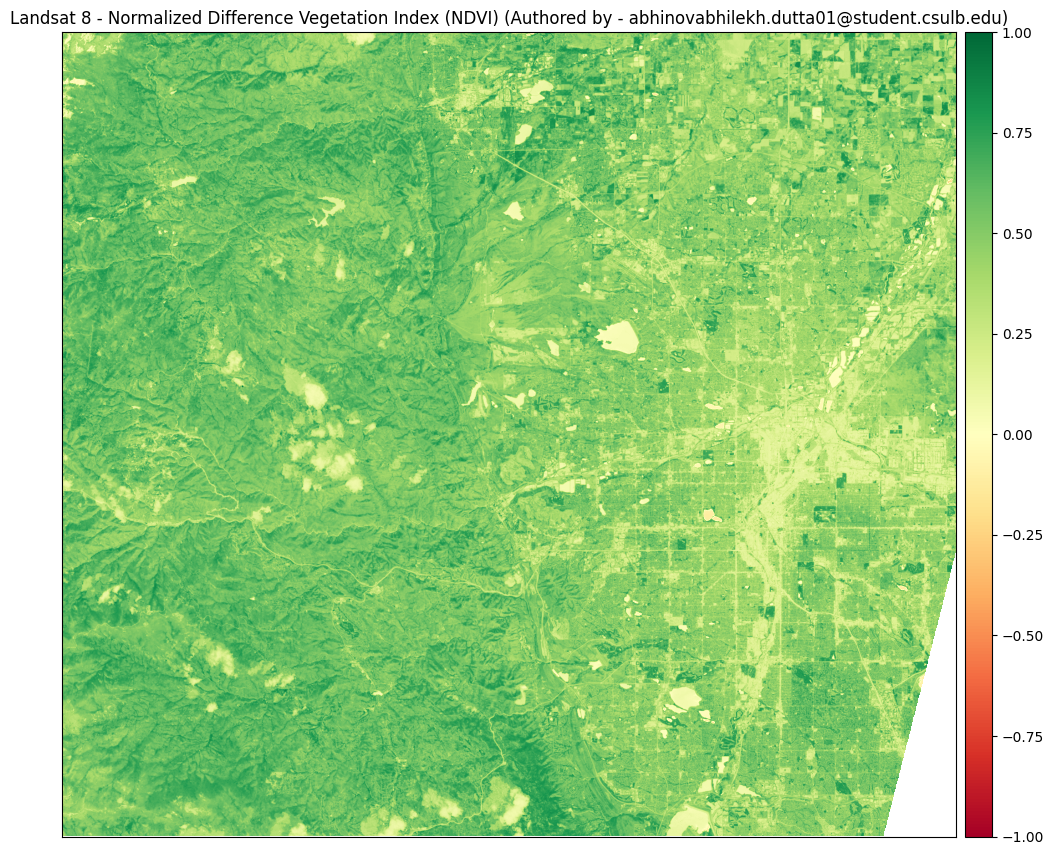

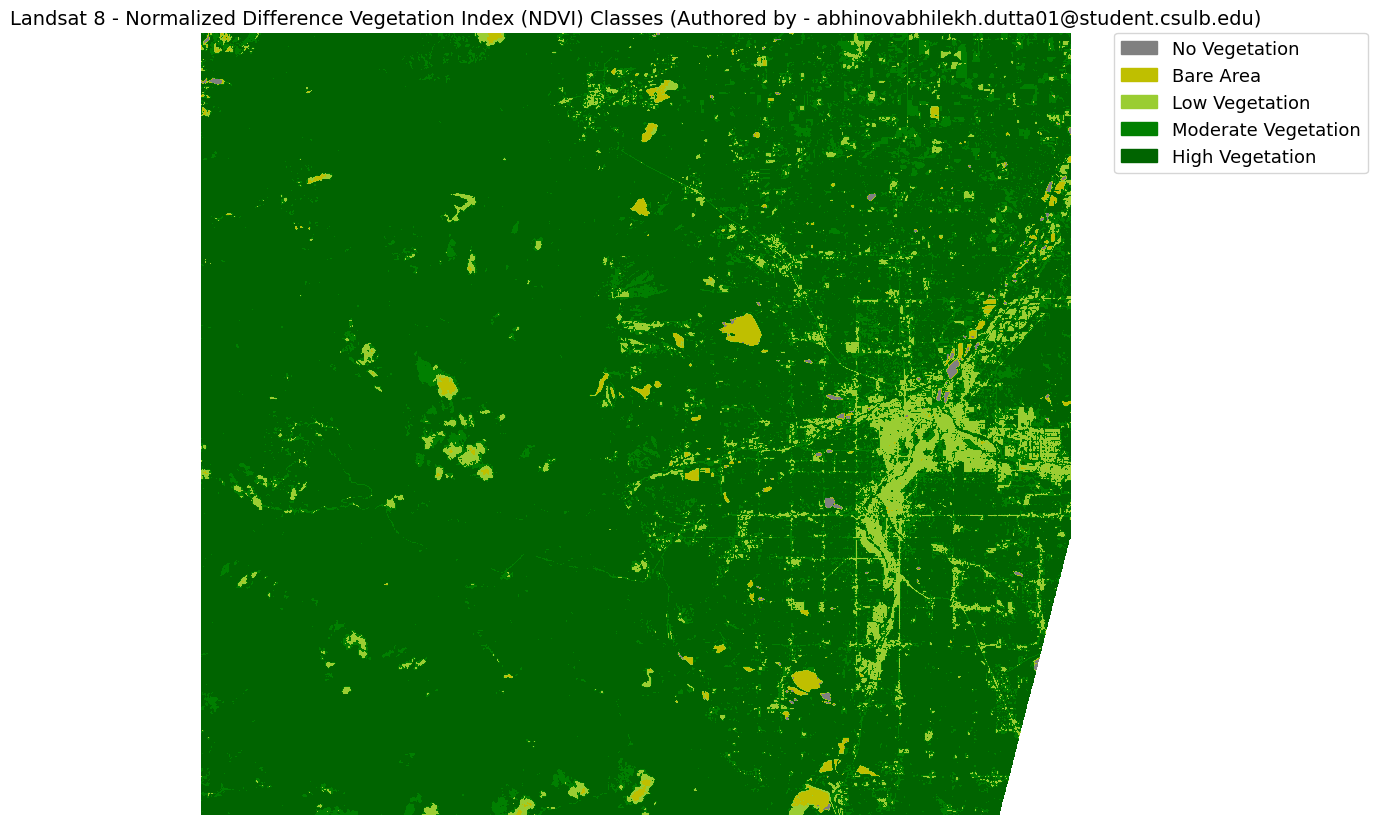

In [15]:
run_everything(
    data_dir="earth-analytics",
    file_name_glob="data/vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band*_crop.tif",
    no_data_value=-9999,
    red_band_number=3,
    nir_band_number=4,
    ndvi_plot_title="Landsat 8 - Normalized Difference Vegetation Index (NDVI)",
    ndvi_plot_cmap="RdYlGn",
    ndvi_class_bins=[-np.inf, 0, 0.1, 0.25, 0.4, np.inf],
    ndvi_class_names=["No Vegetation", "Bare Area", "Low Vegetation", "Moderate Vegetation", "High Vegetation"],
    ndvi_class_colors=["gray", "y", "yellowgreen", "g", "darkgreen"],
    ndvi_class_title="Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    your_csulb_email="(Authored by - abhinovabhilekh.dutta01@student.csulb.edu)"
)

# **PART 2**

**Pettorelli, Nathalie, et al. "Using the satellite-derived NDVI to assess ecological responses to environmental change." Trends in ecology & evolution 20.9 (2005): 503-510.**


The paper discusses the increasing use of normalized difference vegetation index to predict the ecological effects of environmental change on ecosystems and animal populations, enabling a better understanding of the human impact on the environment. The application of NDVI as a covariate rather than a response variable has broadened the scope of the study of trophic interconnections. Researchers can better understand the significance of vegetation dynamics in influencing animal populations by utilizing NDVI as a covariate, such as how changes in vegetation impact prey availability and predator-prey interactions. The paper also elaborates on the pros and cons of smoothing NDVI values and various measures in the context of the ecosystem that can be assessed using the NDVI time series.



---





**Wasser, Leah, et al. "EarthPy: A Python package that makes it easier to explore and plot raster and vector data using open source Python tools." Journal of Open Source Software 4.43 (2019): 1886.**

EarthPy is an open-source Python package built to simplify spatial data analysis with its accessibility to a large audience including researchers, scientists, and analysts. It was initially developed to support the Earth Analytics Education program at EarthLab - University of Colorado, Boulder, and is compatible with common geospatial packages such as rasterio, geopandas, and matplotlib. The objective of the developers was to reduce the repetitive codes for various geoprocessing tasks using helper functions and introduced modules such as io, mask, plot, spatial, and clip to work with both vector and raster datasets. EarthPy also supports education and teaching through the EarthPy Vignettes.



---



**Xu, Yang, et al. "Bibliometric Analysis of Global NDVI Research Trends from 1985 to 2021." Remote Sensing 14.16 (2022): 3967.**

The objective of the paper is to fill the gap in implementing bibliometric reviews, which is a method to analyze scientific research, to NDVI-based research. It reviewed 17,755 pieces of research obtained from the Web of science Citation Indexing (SCI) Expanded database. To convert and examine quantitative data from the selected publications, the bibliometrix R-package and biblioshiny web tool were used. Total citations or the H-index were utilized in the study to identify the leading authors, countries, institutions, and journals in NDVI research. Keywords were also employed to examine the research history and present research hotspots. The analysis also shows that NDVI research data sources are becoming more extensive, application areas are expanding, and research techniques are becoming more diversified.


